In [1]:
import os
from tensorflow.keras.preprocessing import image
import cv2
from tensorflow import keras
import tensorflow as tf

In [2]:
categories=['angry','disgust','fear','happy','neutral','sad','surprise']

In [3]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='images/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='images/validation',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224,224),
    shuffle=True
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [4]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [5]:
from tensorflow.keras.applications.vgg19 import VGG19

In [6]:
vgg=VGG19()

In [7]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
from tensorflow.keras import Sequential
model=Sequential()

In [9]:
models=vgg.layers[:-1]
for layer in models:
    model.add(layer)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
for layer in model.layers:
    layer.trainable=False

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
from tensorflow.keras.layers import Dense

In [14]:
model.add(Dense(7,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [16]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
901/901 [==============================] - 185s 191ms/step - loss: 1.7889 - accuracy: 0.2816 - val_loss: 1.6928 - val_accuracy: 0.3231
Epoch 2/10
901/901 [==============================] - 165s 183ms/step - loss: 1.6916 - accuracy: 0.3348 - val_loss: 1.6152 - val_accuracy: 0.3643
Epoch 3/10
901/901 [==============================] - 165s 183ms/step - loss: 1.6701 - accuracy: 0.3461 - val_loss: 1.6180 - val_accuracy: 0.3772
Epoch 4/10
901/901 [==============================] - 165s 183ms/step - loss: 1.6517 - accuracy: 0.3573 - val_loss: 1.5731 - val_accuracy: 0.3926
Epoch 5/10
901/901 [==============================] - 165s 183ms/step - loss: 1.6426 - accuracy: 0.3684 - val_loss: 1.6456 - val_accuracy: 0.3675
Epoch 6/10
901/901 [==============================] - 165s 183ms/step - loss: 1.6335 - accuracy: 0.3684 - val_loss: 1.7502 - val_accuracy: 0.3382
Epoch 7/10
901/901 [==============================] - 166s 184ms/step - loss: 1.6234 - accuracy: 0.3722 - val_loss: 1.5791 -

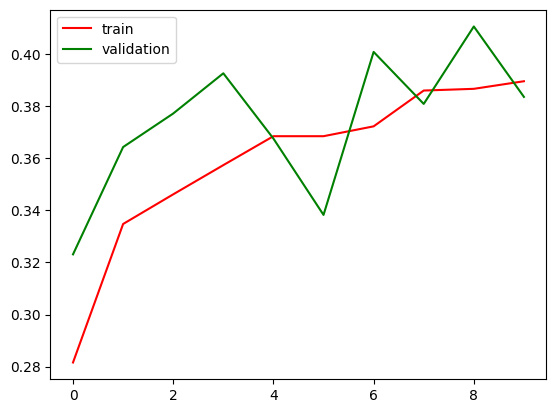

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

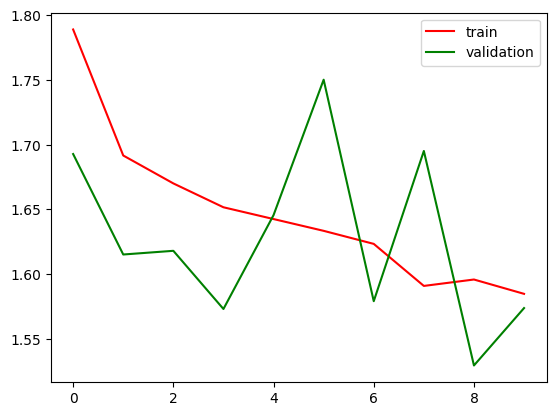

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [34]:
vgg.trainable = False
model.summary(show_trainable=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_ds, epochs=2,batch_size = 32)

Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      N          
                                                                            
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     N          
                                                                            
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         N          
                                                                            
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     N          
                                                                            
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    N          
                                                                            
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0

ResourceExhaustedError: {{function_node __wrapped__Fill_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]

In [20]:
model.save('model1.h5')

## New Model

In [46]:
from keras.applications.resnet_v2 import ResNet152V2

In [47]:
resnet=ResNet152V2(weights="imagenet",include_top=False)

In [37]:
resnet.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_7[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                     

In [48]:
resnet.trainable = False

In [49]:
inputs = keras.Input(shape=(224,224, 3))

In [50]:
scale_layer = keras.layers.Rescaling(scale=1, offset=-1)

In [51]:
x = scale_layer(inputs)

In [52]:
x = resnet(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(7)(x)
model1 = keras.Model(inputs, outputs)

In [53]:
model1.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [54]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, None, None, 2048)  58331648  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 14343     
                                                           

In [55]:
history1=model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
901/901 [==============================] - 223s 238ms/step - loss: 2.0406 - accuracy: 0.1827 - val_loss: 1.9459 - val_accuracy: 0.1718
Epoch 2/10
901/901 [==============================] - 194s 215ms/step - loss: 1.9459 - accuracy: 0.1762 - val_loss: 1.9459 - val_accuracy: 0.1718
Epoch 3/10
901/901 [==============================] - 192s 213ms/step - loss: 1.9468 - accuracy: 0.1809 - val_loss: 1.9459 - val_accuracy: 0.1853
Epoch 4/10
901/901 [==============================] - 203s 226ms/step - loss: 1.9459 - accuracy: 0.1856 - val_loss: 1.9459 - val_accuracy: 0.1853
Epoch 5/10
901/901 [==============================] - 189s 210ms/step - loss: 1.9463 - accuracy: 0.1838 - val_loss: 1.9459 - val_accuracy: 0.1874
Epoch 6/10
901/901 [==============================] - 190s 211ms/step - loss: 1.9459 - accuracy: 0.1827 - val_loss: 1.9459 - val_accuracy: 0.1874
Epoch 7/10
901/901 [==============================] - 191s 212ms/step - loss: 1.9459 - accuracy: 0.1853 - val_loss: 1.9459 -

## My Model

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                      

In [9]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
901/901 [==============================] - 104s 105ms/step - loss: 2.2791 - accuracy: 0.2551 - val_loss: 1.7521 - val_accuracy: 0.2963
Epoch 2/10
901/901 [==============================] - 94s 104ms/step - loss: 1.7521 - accuracy: 0.2872 - val_loss: 2.0184 - val_accuracy: 0.2354
Epoch 3/10
901/901 [==============================] - 94s 104ms/step - loss: 1.7284 - accuracy: 0.2975 - val_loss: 1.6985 - val_accuracy: 0.3164
Epoch 4/10
901/901 [==============================] - 94s 104ms/step - loss: 1.7002 - accuracy: 0.3084 - val_loss: 1.7407 - val_accuracy: 0.2980
Epoch 5/10
901/901 [==============================] - 95s 105ms/step - loss: 1.6988 - accuracy: 0.3106 - val_loss: 1.8338 - val_accuracy: 0.2637
Epoch 6/10
901/901 [==============================] - 94s 104ms/step - loss: 1.6829 - accuracy: 0.3160 - val_loss: 1.6687 - val_accuracy: 0.3303
Epoch 7/10
901/901 [==============================] - 94s 105ms/step - loss: 1.6743 - accuracy: 0.3218 - val_loss: 1.6438 - val_a

In [11]:
model.save('my_model.h5')

## Inception V3

In [19]:
from keras.applications import InceptionV3

In [20]:
base_model=InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [21]:
base_mode.trainable=False

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                      

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam()
              ,loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=15,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

In [57]:
history=model.fit(train_ds,epochs=25,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/25
901/901 [==============================] - 97s 103ms/step - loss: 1.6320 - accuracy: 0.3619 - val_loss: 1.4936 - val_accuracy: 0.4431
Epoch 2/25
901/901 [==============================] - 93s 104ms/step - loss: 1.4918 - accuracy: 0.4295 - val_loss: 1.4249 - val_accuracy: 0.4568
Epoch 3/25
901/901 [==============================] - 91s 100ms/step - loss: 1.4454 - accuracy: 0.4527 - val_loss: 1.3971 - val_accuracy: 0.4707
Epoch 4/25
901/901 [==============================] - 92s 102ms/step - loss: 1.4124 - accuracy: 0.4651 - val_loss: 1.3787 - val_accuracy: 0.4741
Epoch 5/25
901/901 [==============================] - 94s 104ms/step - loss: 1.3840 - accuracy: 0.4760 - val_loss: 1.3865 - val_accuracy: 0.4704
Epoch 6/25
901/901 [==============================] - 94s 105ms/step - loss: 1.3754 - accuracy: 0.4772 - val_loss: 1.3508 - val_accuracy: 0.4887
Epoch 7/25
901/901 [==============================] - 94s 105ms/step - loss: 1.3515 - accuracy: 0.4885 - val_loss: 1.3562 - val_ac

In [28]:
# Unfreeze the top layers of the base model
for layer in base_model.layers[-50:]:
    layer.trainable = True


In [29]:
# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='SparseCategoricalCrossentropy', 
              metrics=['accuracy'])

In [30]:
# Fine-tune the model
history_fine = model.fit(
   train_ds,epochs=10,validation_data=validation_ds,callbacks=[early_stopping]
)

Epoch 1/10
901/901 [==============================] - 87s 92ms/step - loss: 1.5896 - accuracy: 0.3819 - val_loss: 1.5248 - val_accuracy: 0.4253
Epoch 2/10
901/901 [==============================] - 83s 92ms/step - loss: 1.5404 - accuracy: 0.4066 - val_loss: 1.5030 - val_accuracy: 0.4382
Epoch 3/10
901/901 [==============================] - 81s 90ms/step - loss: 1.5194 - accuracy: 0.4175 - val_loss: 1.4932 - val_accuracy: 0.4413
Epoch 4/10
901/901 [==============================] - 82s 91ms/step - loss: 1.5077 - accuracy: 0.4201 - val_loss: 1.4865 - val_accuracy: 0.4434
Epoch 5/10
901/901 [==============================] - 81s 89ms/step - loss: 1.5002 - accuracy: 0.4255 - val_loss: 1.4814 - val_accuracy: 0.4442
Epoch 6/10
901/901 [==============================] - 81s 90ms/step - loss: 1.4946 - accuracy: 0.4296 - val_loss: 1.4775 - val_accuracy: 0.4413
Epoch 7/10
901/901 [==============================] - 81s 90ms/step - loss: 1.4853 - accuracy: 0.4343 - val_loss: 1.4730 - val_accuracy:

In [58]:
model.save('model_best_2.h5')

## Combined Model

In [5]:
from keras.applications import InceptionV3

In [6]:
base_model=InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [7]:
base_model.trainable=False

In [13]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(7,activation='softmax'),
    layers.Dropout(0.1),
    
])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                      

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam()
              ,loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor the validation loss
    patience=15,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

In [18]:
history=model.fit(train_ds,epochs=25,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/25
901/901 [==============================] - 97s 103ms/step - loss: 2.9046 - accuracy: 0.3752 - val_loss: 1.4316 - val_accuracy: 0.4534
Epoch 2/25
901/901 [==============================] - 90s 100ms/step - loss: 2.7948 - accuracy: 0.4259 - val_loss: 1.4009 - val_accuracy: 0.4684
Epoch 3/25
901/901 [==============================] - 90s 100ms/step - loss: 2.6618 - accuracy: 0.4461 - val_loss: 1.3867 - val_accuracy: 0.4792
Epoch 4/25
901/901 [==============================] - 90s 100ms/step - loss: 2.6691 - accuracy: 0.4574 - val_loss: 1.3797 - val_accuracy: 0.4819
Epoch 5/25
901/901 [==============================] - 90s 100ms/step - loss: 2.6637 - accuracy: 0.4625 - val_loss: 1.4185 - val_accuracy: 0.4833
Epoch 6/25
901/901 [==============================] - 92s 102ms/step - loss: 2.6476 - accuracy: 0.4742 - val_loss: 1.4034 - val_accuracy: 0.4687
Epoch 7/25
901/901 [==============================] - 91s 101ms/step - loss: 2.5784 - accuracy: 0.4763 - val_loss: 1.3995 - val_ac

KeyboardInterrupt: 